In [68]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [69]:
mu = jnp.array([0, 0])
R = jnp.array([[1, 0.5], [0.5, 1]])
R

Array([[1. , 0.5],
       [0.5, 1. ]], dtype=float32)

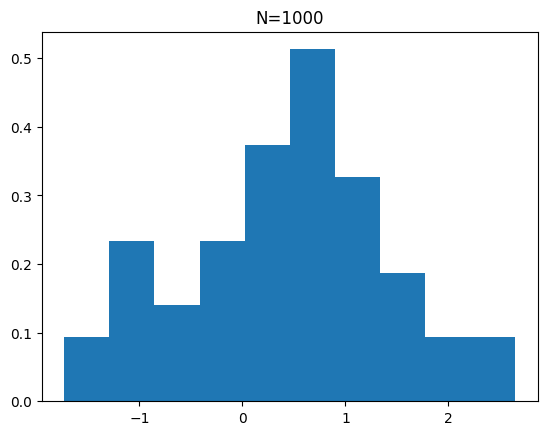

N: 1000, 95% confidence interval: ( 0.3636 ,  0.4863 )


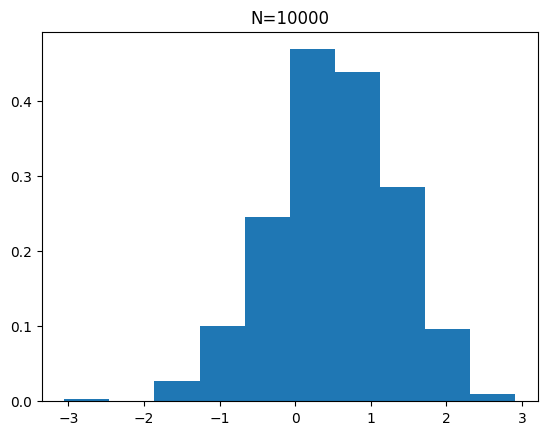

N: 10000, 95% confidence interval: ( 0.49069998 ,  0.5225 )


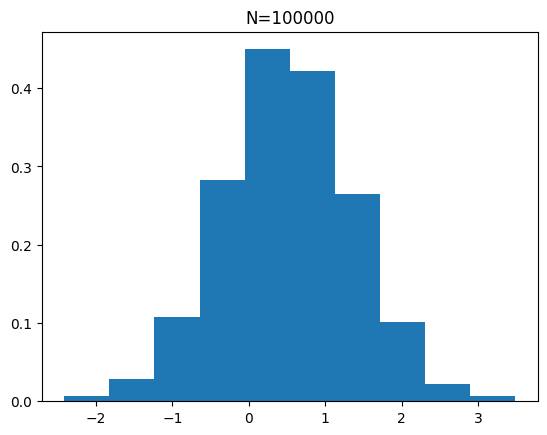

N: 100000, 95% confidence interval: ( 0.5008 ,  0.5114 )


In [70]:


for N in [10**3, 10**4, 10**5]:
    key = jax.random.PRNGKey(2024)
    x = mu + jax.random.multivariate_normal(key=key, mean=mu, cov=R, shape=(N,))
    
    # approximate p(x1|x2=1), x1|x2=1 ~ N(1/2, 3/4)
    x1_given_x2 = x[(x[:, 1]>0.9) & (x[:, 1]<1.1)]
    m = x1_given_x2[:,0].mean()
    std =  x1_given_x2[:,0].std()
    l = jnp.round(m-1.96*std*jnp.sqrt(1/N), decimals=4)
    u = jnp.round(m+1.96*std*jnp.sqrt(1/N), decimals=4)
    plt.hist(x1_given_x2[:, 0], density=True)
    plt.title(f"N={N}")
    plt.show()
    print(f"N: {N}, 95% confidence interval: (", l, ", ", u, ")")
    